In [1]:
import torch
from google.colab import files
from IPython.display import Image
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
cd '/gdrive/My Drive/Colab Notebooks/YOLO'

/gdrive/My Drive/Colab Notebooks/YOLO


In [3]:
import os
import cv2
import re
import matplotlib.pyplot as plt
from IPython.display import Image, display
%matplotlib inline
!ls sperm_dataset

Data215  Data217  Data219  Data221    test   valid
Data216  Data218  Data220  data.yaml  train


In [4]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

def distance_between_center(x1,y1,x2,y2):
  return ((((x2 - x1 )**2) + ((y2-y1)**2) )**0.5)

In [5]:
labels_path = "sperm_dataset/test/labels"
images_path = "sperm_dataset/test/images"

total_images = list(os.listdir(images_path))
total_labels = list(os.listdir(labels_path))
print("total images in is ", len(total_images), "total_labels is", len(total_labels))
print("*"*20)

total_images.sort(key=natural_keys)
total_labels.sort(key=natural_keys)

total images in is  100 total_labels is 100
********************


First frame sperm bounding boxes

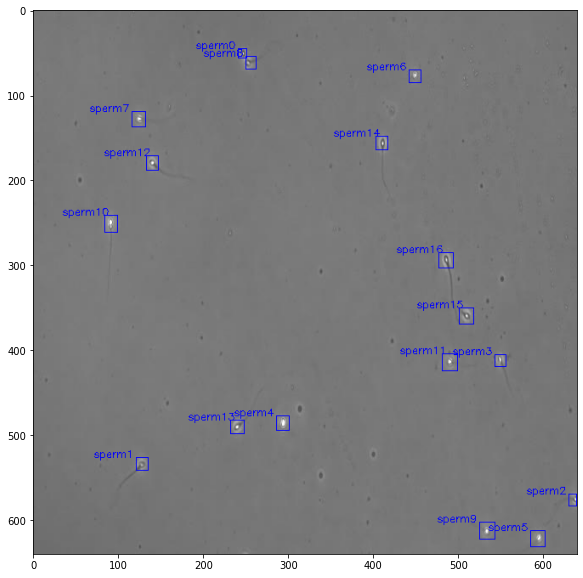

In [6]:
classes = ["sperm"]
image_to_find = 0
image_id = total_images[image_to_find]
label_id = total_images[image_to_find].replace(".jpg",".txt")
image_path = os.path.join(images_path,image_id)
label_path = os.path.join(labels_path,label_id)
plt.figure(figsize=(10,10))
img = cv2.imread(image_path)
dh, dw, _ = img.shape

fl = open(label_path, 'r')
data = fl.readlines()
fl.close()
count = 0
for dt in data:
    
    # Split string to float
    class_label, x, y, w, h, conf = map(float, dt.split(' '))
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1

    cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)
    cv2.putText(img, classes[int(class_label)]+str(count), (l-50, t), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1)
    count+=1
plt.imshow(img)
plt.show()

Second Frame Sperm Bounding Boxes

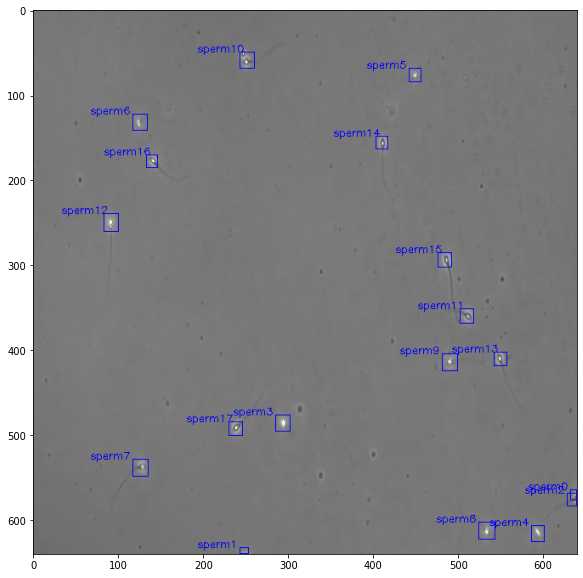

In [7]:
classes = ["sperm"]
image_to_find = 1
image_id = total_images[image_to_find]
label_id = total_images[image_to_find].replace(".jpg",".txt")
image_path = os.path.join(images_path,image_id)
label_path = os.path.join(labels_path,label_id)
plt.figure(figsize=(10,10))
img = cv2.imread(image_path)
dh, dw, _ = img.shape

fl = open(label_path, 'r')
data = fl.readlines()
fl.close()
count = 0
for dt in data:
    # Split string to float
    class_label, x, y, w, h, conf = map(float, dt.split(' '))
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1

    cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)
    cv2.putText(img, classes[int(class_label)]+str(count), (l-50, t), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1)
    count+=1
plt.imshow(img)
plt.show()

In [8]:
## saving all of them in a dictionary for the second frame
classes = ["sperm"]
results = {}
for i in range(len(total_images)):
  #print(i)
  image_id = total_images[i]
  label_id = total_images[i].replace(".jpg",".txt")
  image_path = os.path.join(images_path,image_id)
  label_path = os.path.join(labels_path,label_id)
  results[image_path] = []
  fl = open(label_path, 'r')
  data = fl.readlines()
  fl.close()

  for dt in data:
      # Split string to float
      class_label, x, y, w, h, conf = map(float, dt.split(' '))
      cordinates = [x,y]
      results[image_path].append(cordinates)

In [9]:
len(total_images)

100

In [10]:
images = list(results.keys())

TRACKING A SINGLE SPERM BETWEEN 2 FRAMES

In [11]:
#detect distance of sperm 13 from the first frame to second sperm
#count start from 1 so the sperm index in list is 12
#tracking a single sperm
index_to_find = 12
first_frame = 0
second_frame = 1
image1_data = results[images[first_frame]]
image2_data = results[images[second_frame]]
x1 = image2_data[index_to_find][0]
y1 = image2_data[index_to_find][1]
max = 100.00
index = 0
count = 0
for x,y in image1_data:
  distance = distance_between_center(x1,y1,x,y)
  print(distance)
  if(distance<=max):
    max = distance
    index = count
  count+=1

print("hence sperm index " + str(index_to_find + 1) + " in frame " + str(second_frame) + " is index " + str(index+1) + " in frame " +  str(first_frame))

0.39440645674873276
0.4459511797136543
0.989199118822899
0.7580761430568832
0.4858902338347624
0.9768938053012722
0.6198579839874615
0.19822940417607066
0.3909902274595108
0.8931845539758286
0.0011052081251963226
0.6737492878883065
0.13391048491062973
0.441234543594447
0.5198478020584486
0.6757215216381672
0.6185894674960122
hence sperm index 13 in frame 1 is index 11 in frame 0


In [12]:
sperm_info = {}
max = 100.00
sperm_count = 0
sperm_q = []
top_queue = 0
image1_data = results[images[0]]
tracking_new_sperm = []
for x1,y1 in image1_data:
  sperm_info[random.randint(0,100000)] = {'frame':0, 'cordinates':[[x1,y1]], 'distance':0, 'index':[sperm_count]}
  sperm_count+=1
for frame in range(1, 2):
  print(images[frame])
  image_data = results[images[frame]]
  count = 0
  for x,y in image_data:
    max = 100.00
    for key in sperm_info:
      distance = distance_between_center(sperm_info[key]['cordinates'][-1][0],sperm_info[key]['cordinates'][-1][1],x,y)
      if(distance<=max):
        max = distance
        index = key
        predicted_x = x
        predicted_y = y

      max_q = 100.00
      for left_over_index in sperm_q.queue:
        distance_q = distance_between_center(left_over_index[0],left_over_index[1],sperm_info[key]['cordinates'][-1][0],sperm_info[key]['cordinates'][-1][1])
        if(distance_q<=max_q):
          max_q = distance_q
          index_queue = key
          predicted_x_queue = x
          predicted_y_queue = y

      if(max_q<=0.05):
        sperm_info[index_queue]['cordinates'].append([predicted_x,predicted_y])
        sperm_info[index_queue]['distance']+=max
        sperm_info[index_queue]['index'].append(count)
      
    print(count, sperm_info[index])
    if(max>=0.05):
      print("new sperm detected in frame "+ str(frame))
      sperm_q.append([x,y])
      if(len(sperm_q)==0):
        top_queue
      if(top_queue == sperm_q[0]):
        top_queue+=1  
      if(top_queue==5):

    else:
      sperm_info[index]['cordinates'].append([predicted_x,predicted_y])
      sperm_info[index]['distance']+=max
      sperm_info[index]['index'].append(count)
    count+=1

IndentationError: ignored

In [ ]:
random.seed(100)
sperm_info = {}
max = 100.00
sperm_count = 0
sperm_q = []
top_queue = 0
image1_data = results[images[0]]
tracking_new_sperm = []
for x1,y1 in image1_data:
  sperm_info[random.randint(0,100000)] = {'frame':0, 'cordinates':[[x1,y1]], 'distance':0, 'index':[sperm_count]}
  sperm_count+=1
for frame in range(1, len(results)):
  print(images[frame])
  image_data = results[images[frame]]
  count = 0
  for x,y in image_data:
    max = 100.00
    for key in sperm_info:
      distance = distance_between_center(sperm_info[key]['cordinates'][-1][0],sperm_info[key]['cordinates'][-1][1],x,y)
      if(distance<=max):
        max = distance
        index = key
        predicted_x = x
        predicted_y = y

    #print(count, sperm_info[index])
    if(max>=0.05):
      print("new sperm detected in frame "+ str(frame))

    else:
      sperm_info[index]['cordinates'].append([predicted_x,predicted_y])
      sperm_info[index]['distance']+=max*640
      sperm_info[index]['index'].append(count)
    count+=1

In [ ]:
for key in sperm_info:
  print(key, sperm_info[key]['distance'],sperm_info[key]['index'][0],sperm_info[key]['index'][-1])

19093 63.0539992999426 0 9
60231 630.869875115449 1 8
59628 26.219536805943026 2 0
22904 546.2494506460084 3 14
92473 51.54204064769933 4 4
51515 455.31070729790497 5 1
95939 43.10862912737722 6 3
45840 333.41570757041114 7 0
56821 288.5125214116897 8 11
66435 65.69852477125204 9 0
14413 125.20027143376184 10 7
69848 68.57151249159985 11 5
15900 253.86513122679057 12 10
10505 315.2812810207514 13 13
96562 36.25647504633718 14 12
59761 209.62390431019554 15 0
34526 113.32646773869781 16 2


In [ ]:
fast_index = 40620
sec_fast_index = 71384
thir_fast_index = 72387
print(distance_between_center(sperm_info[40620]['cordinates'][-1][0],
                              sperm_info[40620]['cordinates'][-1][1],sperm_info[40620]['cordinates'][0][0],sperm_info[40620]['cordinates'][0][1])*640)

print(distance_between_center(sperm_info[71384]['cordinates'][-1][0],
                              sperm_info[71384]['cordinates'][-1][1],sperm_info[71384]['cordinates'][0][0],sperm_info[71384]['cordinates'][0][1])*640)

print(distance_between_center(sperm_info[72387]['cordinates'][-1][0],
                              sperm_info[72387]['cordinates'][-1][1],sperm_info[72387]['cordinates'][0][0],sperm_info[72387]['cordinates'][0][1])*640)

In [ ]:
classes = ["sperm"]
image_to_find = 0
image_id = total_images[image_to_find]
label_id = total_images[image_to_find].replace(".jpg",".txt")
image_path = os.path.join(images_path,image_id)
label_path = os.path.join(labels_path,label_id)
plt.figure(figsize=(10,10))
img = cv2.imread(image_path)
dh, dw, _ = img.shape

fl = open(label_path, 'r')
data = fl.readlines()
fl.close()
count = 0
for dt in data:
    
    # Split string to float
    class_label, x, y, w, h, conf = map(float, dt.split(' '))
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1

    cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)
    cv2.putText(img, classes[int(class_label)]+str(count), (l-50, t), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1)
    count+=1
plt.imshow(img)
plt.show()

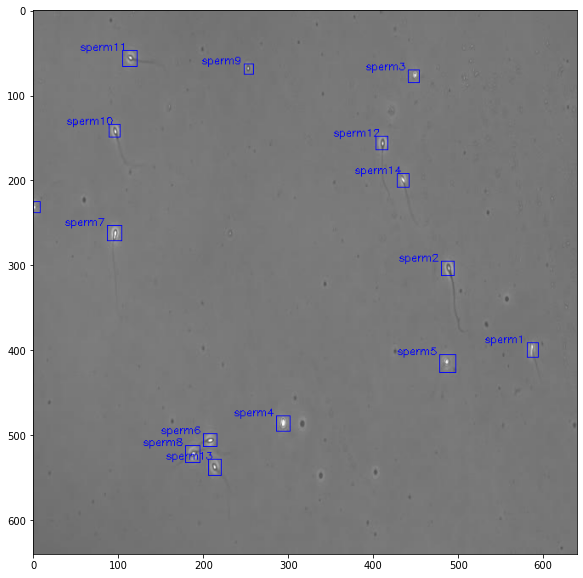

In [ ]:
classes = ["sperm"]
image_to_find = len(total_images)-1
image_id = total_images[image_to_find]
label_id = total_images[image_to_find].replace(".jpg",".txt")
image_path = os.path.join(images_path,image_id)
label_path = os.path.join(labels_path,label_id)
plt.figure(figsize=(10,10))
img = cv2.imread(image_path)
dh, dw, _ = img.shape

fl = open(label_path, 'r')
data = fl.readlines()
fl.close()
count = 0
for dt in data:
    
    # Split string to float
    class_label, x, y, w, h, conf = map(float, dt.split(' '))
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1

    cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)
    cv2.putText(img, classes[int(class_label)]+str(count), (l-50, t), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1)
    count+=1
plt.imshow(img)
plt.show()

In [ ]:
import cv2
import numpy as np
import glob
 
img_array = []
count=0

for filename in total_images:
    img = cv2.imread("sperm_dataset/test/images/" + filename)
    height, width, layers = img.shape
    size = (width,height)
    image = cv2.circle(img, (int(sperm_info[fast_index]['cordinates'][count][0]*640),int(sperm_info[fast_index]['cordinates'][count][1]*640)), radius=0, color=(0, 0, 255), thickness=2)
    image = cv2.circle(img, (int(sperm_info[sec_fast_index]['cordinates'][count][0]*640),int(sperm_info[sec_fast_index]['cordinates'][count][1]*640)), radius=0, color=(255, 0, 0), thickness=2)
    image = cv2.circle(img, (int(sperm_info[thir_fast_index]['cordinates'][count][0]*640),int(sperm_info[thir_fast_index]['cordinates'][count][1]*640)), radius=0, color=(0, 255, 0), thickness=2)
    for i in range(count):
      image = cv2.circle(img, (int(sperm_info[fast_index]['cordinates'][i][0]*640),int(sperm_info[fast_index]['cordinates'][i][1]*640)), radius=0, color=(0, 0, 255), thickness=2)
      image = cv2.circle(img, (int(sperm_info[sec_fast_index]['cordinates'][i][0]*640),int(sperm_info[sec_fast_index]['cordinates'][i][1]*640)), radius=0, color=(255, 0, 0), thickness=2)
      image = cv2.circle(img, (int(sperm_info[thir_fast_index]['cordinates'][i][0]*640),int(sperm_info[thir_fast_index]['cordinates'][i][1]*640)), radius=0, color=(0, 255, 0), thickness=2)
    img_array.append(image)
    count+=1

out = cv2.VideoWriter('sperm_detected_226.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()